<h1><center> Anwendung höherer Programmiersprachen im Maschinenbau <br > Leistungsnachweis Jonathan Bauer </center></h1>
<h2><center>ParticleSimulation <br> Simulation des Verhaltens von Aerosolen, umgesetzt durch Fortran und Python </center></h2>

Importiere notwendige Python Bibliotheken

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import file_interface as fi
import visualization as vis
from mpl_toolkits.mplot3d import Axes3D

In [3]:
config_dir = '/home/jonathan/Desktop/HPM2020/ParticleSimulation/data/config.d'
fi.write_config(config_dir, concentration=20)

Config written successfully


Remove old *.dat files and run Fortran-Simulation

In [1]:
project_dir = "/home/jonathan/Desktop/HPM2020/ParticleSimulation"
! rm $project_dir/data/*.dat
! $project_dir make run

rm: cannot remove &#39;/home/jonathan/Desktop/HPM2020/ParticleSimulation/data/*.dat&#39;: No such file or directory
/usr/bin/sh: 1: /home/jonathan/Desktop/HPM2020/ParticleSimulation/ParticleSimulation.sh: Permission denied


<h4>Lade Fortran-Programmdaten in Python-Array</h4><br>
Die Variable Directory spezifiziert den individuellen Pfad zu den aus dem Fortran Code erstellten ".dat" Dateien.

In [7]:
directory = "/home/jonathan/Desktop/HPM2020/ParticleSimulation/data"
data = fi.load_all(directory)

In [8]:
num_of_timesteps, num_of_particles, num_of_variables = np.shape(data)

print('Number of Timesteps: ' + str(num_of_timesteps))
print('Number of Particles: ' + str(num_of_particles))
print('Number of Variables: ' + str(num_of_variables))

Number of Timesteps: 11
Number of Particles: 20
Number of Variables: 23


<h4> Allgemeine Information zum Aufbau des vom Fortran Code gespeicherten Datenarray</h4>
array(1) = Partikelindex <br>
array(2) = Simulationszeit <br>

array(3) = X-Positionskoordinate <br>
array(4) = Y-Positionskoordinate <br>
array(5) = Z-Positionskoordinate <br>

array(6) = X-Geschwindigkeitskomponente <br>
array(7) = Y-Geschwindigkeitskomponente <br>
array(8) = Z-Geschwindigkeitskomponente <br>

array(9) = Durchmesser Aerosolkern <br>
array(10) = Durchmesser Aerosolhülle <br>

array(11) = Partikeltemperatur <br>
array(12) = Umgebungstemperatur <br>
array(13) = Luftfeuchtigkeit <br>

array(14) = X-Windgeschwindigkeitskomponente <br>
array(15) = Y-Windgeschwindigkeitskomponente <br>
array(16) = Z-Windgeschwindigkeitskomponente <br>

array(17) = Masse des Partikelkern <br>
array(18) = Masse der Partikelschale <br>

array(19) = An Partikel angreifende Kraft (X-Richtung) <br>
array(20) = An Partikel angreifende Kraft (Y-Richtung) <br>
array(21) = An Partikel angreifende Kraft (Z-Richtung) <br>

array(22) = Bool'sche Variable: Schale komplett verdunstet? <br>
array(23) = Bool'sche Variable: Partikelstatus: noch in der Luft? <br>

<h4> Visualisierung der Partikelbewegung </h4> <br>
Position, Geschwindigkeitsvektor und Partikelstatus <br>
Indexvariablen müssen angepasst werden

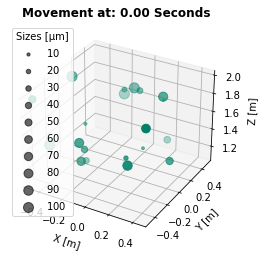

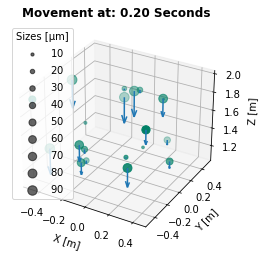

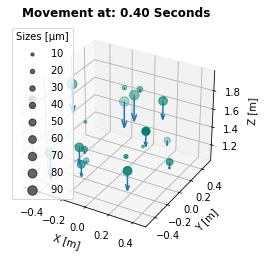

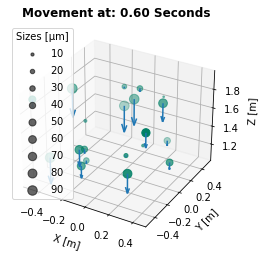

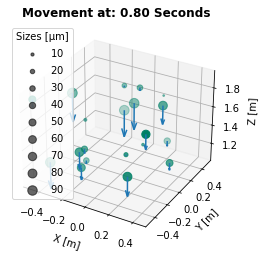

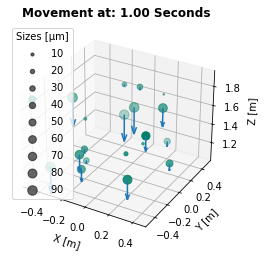

In [10]:
num_of_charts = 6
start = 0
end = num_of_timesteps
spacing = int((end-start)/(num_of_charts-1))

vis.show_movement_notebook(data, t_start_idx=start, t_end_idx=num_of_timesteps, t_spacing=spacing)

<h4> Visualisierung des Partikeldurchmessers </h4>

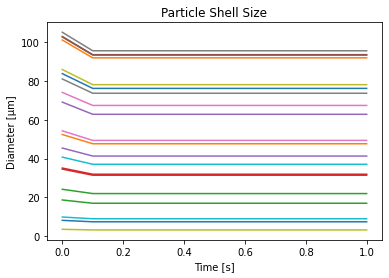

In [11]:
fig2 = vis.plot_single_feature(data, 9, "Particle Shell Size", "Diameter [µm]")
plt.show()

<h4> Visualisierung der angreifenden Kräfte </h4>

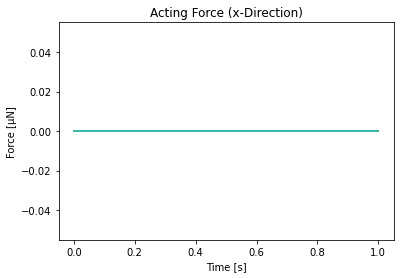

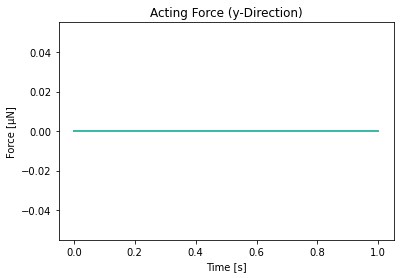

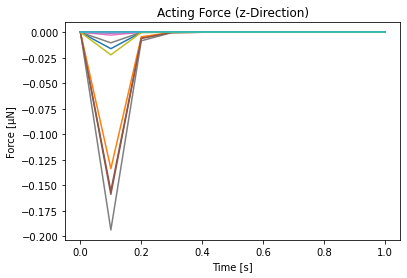

In [12]:
fig3 = vis.plot_single_feature(data, 18, 'Acting Force (x-Direction)', 'Force [µN]')
fig4 = vis.plot_single_feature(data, 19, 'Acting Force (y-Direction)', 'Force [µN]')
fig5 = vis.plot_single_feature(data, 20, 'Acting Force (z-Direction)', 'Force [µN]')
plt.show()